#**Sentiment Analysis of Tokopedia Products' Reviews:**

#*Exploratory Data Analysis*

# Introduction

## Team Members

*   Qothrunnadaa Alyaa (Data Analyst)
*   Athalla Rafly Mahardhika Noegroho (Data Scientist)
*   Habibi Bagus Suliano (Data Scientist)
*   Achmad Dhani (Data Engineer)

Notebook PIC:

Qothrunnadaa Alyaa

Dashboard Link:

https://public.tableau.com/views/TokopediaReviewsSentimentAnalysis/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

## Objective

Exploratory Data Analysis (EDA) ini akan mengeksplorasi mengenai hubungan review/ulasan produk yang ada di platform Tokopedia dengan sentimen dari review tersebut, rating dari produk yang diulas, serta emotional tone dari review tersebut. EDA ini selain dapat memberikan insight bagi penjual, jasa ekspedisi, maupun Tokopedia sebagai pemiliki platform untuk meningkatkan pengalaman berbelanja pembeli/user Tokopedia, juga dapat menjadi dasar pembuatan model berbasis Natural Language Processing (NLP) yang dapat memprediksi sentimen dari review produk yang ada di Tokopedia.

# Import Libraries

In [ ]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from pandas.core.indexers import check_array_indexer
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nlp_id.stopword import StopWord
from nltk.tokenize import word_tokenize
from nlp_id.lemmatizer import Lemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
nltk.download('stopwords')
nltk.download('punkt')

import joblib

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Data Loading

## Setting Kaggle

In [5]:
!mkdir -p /root/.kaggle/

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!cp '/content/drive/MyDrive/kaggle.json' /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

## Download Dataset

In [8]:
!kaggle datasets download -d jocelyndumlao/prdect-id-indonesian-emotion-classification

  0% 0.00/306k [00:00<?, ?B/s]
100% 306k/306k [00:00<00:00, 36.0MB/s]


In [9]:
!unzip /content/prdect-id-indonesian-emotion-classification.zip -d dataset

Archive:  /content/prdect-id-indonesian-emotion-classification.zip
  inflating: dataset/Product Reviews Dataset for Emotions Classification Tasks - Indonesian (PRDECT-ID) Dataset/PRDECT-ID Dataset.csv  


## Load Dataset

In [10]:
# Load Data
df = pd.read_csv('/content/prdect-id-indonesian-emotion-classification.zip')
copy = df.copy()
df

Category  \
0     Computers and Laptops   
1     Computers and Laptops   
2     Computers and Laptops   
3     Computers and Laptops   
4     Computers and Laptops   
...                     ...   
5395              Household   
5396              Household   
5397              Household   
5398              Household   
5399              Household   

                                           Product Name  \
0     Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...   
1     PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...   
2                   SSD Midasforce 128 Gb - Tanpa Caddy   
3     ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
4     ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
...                                                 ...   
5395  PCK-01 Penjepit Barang / Pickup Tool Ver.1 Ala...   
5396  Ultrasonic Aroma Diffuser Humidifier Colorful ...   
5397  Ultrasonic Aroma Diffuser Humidifier Colorful ...   
5398  Ultrasonic Aroma Diffuser Humidifier Colorful ...   
5399  TDS Meter 3 Alat Ukur Hidroponik Air Aquarium ...   

                    Location   Price  Overall Rating  Number Sold  \
0              Jakarta Utara   53500             4.9         5449   
1     Kota Tangerang Selatan   72000             4.9         2359   
2              Jakarta Barat  213000             5.0        12300   
3              Jakarta Timur   55000             4.7         2030   
4              Jakarta Timur   55000             4.7         2030   
...                      ...     ...             ...          ...   
5395           Jakarta Pusat   35000             4.9         1431   
5396           Jakarta Utara   99000             4.9        15529   
5397           Jakarta Utara   99000             4.9        15529   
5398           Jakarta Utara   99000             4.9        15529   
5399           Jakarta Utara   14400             4.9         4765   

      Total Review  Customer Rating  \
0             2369                5   
1             1044                5   
2             3573                5   
3              672                5   
4              672                5   
...            ...              ...   
5395           562                5   
5396          4074                5   
5397          4074                5   
5398          4074                5   
5399          3044                5   

                                        Customer Review Sentiment Emotion  
0     Alhamdulillah berfungsi dengan baik. Packaging...  Positive   Happy  
1     barang bagus dan respon cepat, harga bersaing ...  Positive   Happy  
2     barang bagus, berfungsi dengan baik, seler ram...  Positive   Happy  
3     bagus sesuai harapan penjual nya juga ramah. t...  Positive   Happy  
4     Barang Bagus, pengemasan Aman, dapat Berfungsi...  Positive   Happy  
...                                                 ...       ...     ...  
5395  Harga bersaing, barang sesuai pesanan. Saya na...  Positive    Love  
5396  Beli ini krn Anak & Istri mau liburan di Jakar...  Positive    Love  
5397  pengemasan barang baik, kondisi barang jg utuh...  Positive   Happy  
5398  Mungil tapi bekerja dng baik. Dan murahh terja...  Positive   Happy  
5399  Produk sesuai deskripsi, packing aman terlindu...  Positive    Love  

[5400 rows x 11 columns]

# Exploratory Data Analysis (EDA)

## Information About Dataset

In [11]:
# Menampilkan informasi mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         5400 non-null   object 
 1   Product Name     5400 non-null   object 
 2   Location         5400 non-null   object 
 3   Price            5400 non-null   int64  
 4   Overall Rating   5400 non-null   float64
 5   Number Sold      5400 non-null   int64  
 6   Total Review     5400 non-null   int64  
 7   Customer Rating  5400 non-null   int64  
 8   Customer Review  5400 non-null   object 
 9   Sentiment        5400 non-null   object 
 10  Emotion          5400 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 464.2+ KB


In [12]:
df['Product Name'].nunique()

1308

Dataset ini mencakup informasi mengenai produk yang dijual di Tokopedia, yaitu nama produknya, kategori produk, lokasi penjual dari produk tersebut, harga produk, rating produk secara keseluruhan, serta jumlah produk yang terjual. Dataset ini juga mencakup review dari masing-masing pembeli, di mana terdapat informasi rating yang diberikan pembeli tersebut, ulasan/review yang diberikan pembeli tersebut, sentimen dari review tersebut, serta emosi yang dirasakan dari review tersebut.

Dataset ini mencakup 5400 review dari 1308 produk yang berbeda yang ada di Tokopedia, dan tidak ada data yang hilang/kosong dalam dataset ini.

### Checking Duplicates

In [11]:
# Cek data duplikat
df.duplicated().sum()

7

In [12]:
# Menghapus data-data yang terduplikat
df = df.drop_duplicates(keep='first')

Terdapat 7 entry data yang duplikat, sehingga data yang terduplikat akan dihapus dan entry data yang terlebih dahulu yang akan dipertahankan dari data-data yang terduplikat.

### Changing Columns

Untuk mempermudah analisa data, maka nama kolom akan disesuaikan menjadi snake case, yaitu sistem penamaan kolom di mana semua kata berupa lowercase dan tiap kata dipisahkan oleh garis bawah/underscore.

In [13]:
# Mengganti spasi menjadi garis bawah (_) dan merubah nama kolom menjadi lowercase
df.columns = df.columns.str.replace(' ', '_').str.lower()
df

category  \
0     Computers and Laptops   
1     Computers and Laptops   
2     Computers and Laptops   
3     Computers and Laptops   
4     Computers and Laptops   
...                     ...   
5395              Household   
5396              Household   
5397              Household   
5398              Household   
5399              Household   

                                           product_name  \
0     Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...   
1     PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...   
2                   SSD Midasforce 128 Gb - Tanpa Caddy   
3     ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
4     ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
...                                                 ...   
5395  PCK-01 Penjepit Barang / Pickup Tool Ver.1 Ala...   
5396  Ultrasonic Aroma Diffuser Humidifier Colorful ...   
5397  Ultrasonic Aroma Diffuser Humidifier Colorful ...   
5398  Ultrasonic Aroma Diffuser Humidifier Colorful ...   
5399  TDS Meter 3 Alat Ukur Hidroponik Air Aquarium ...   

                    location   price  overall_rating  number_sold  \
0              Jakarta Utara   53500             4.9         5449   
1     Kota Tangerang Selatan   72000             4.9         2359   
2              Jakarta Barat  213000             5.0        12300   
3              Jakarta Timur   55000             4.7         2030   
4              Jakarta Timur   55000             4.7         2030   
...                      ...     ...             ...          ...   
5395           Jakarta Pusat   35000             4.9         1431   
5396           Jakarta Utara   99000             4.9        15529   
5397           Jakarta Utara   99000             4.9        15529   
5398           Jakarta Utara   99000             4.9        15529   
5399           Jakarta Utara   14400             4.9         4765   

      total_review  customer_rating  \
0             2369                5   
1             1044                5   
2             3573                5   
3              672                5   
4              672                5   
...            ...              ...   
5395           562                5   
5396          4074                5   
5397          4074                5   
5398          4074                5   
5399          3044                5   

                                        customer_review sentiment emotion  
0     Alhamdulillah berfungsi dengan baik. Packaging...  Positive   Happy  
1     barang bagus dan respon cepat, harga bersaing ...  Positive   Happy  
2     barang bagus, berfungsi dengan baik, seler ram...  Positive   Happy  
3     bagus sesuai harapan penjual nya juga ramah. t...  Positive   Happy  
4     Barang Bagus, pengemasan Aman, dapat Berfungsi...  Positive   Happy  
...                                                 ...       ...     ...  
5395  Harga bersaing, barang sesuai pesanan. Saya na...  Positive    Love  
5396  Beli ini krn Anak & Istri mau liburan di Jakar...  Positive    Love  
5397  pengemasan barang baik, kondisi barang jg utuh...  Positive   Happy  
5398  Mungil tapi bekerja dng baik. Dan murahh terja...  Positive   Happy  
5399  Produk sesuai deskripsi, packing aman terlindu...  Positive    Love  

[5393 rows x 11 columns]

## Sentiment Class Balance

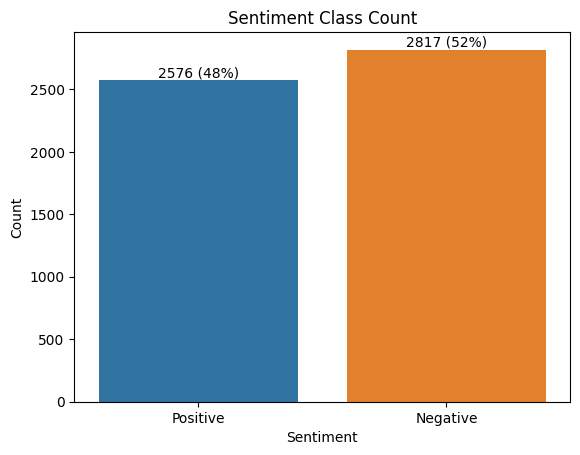

In [22]:
ax = sns.countplot(x=df['sentiment'])

val = df['sentiment'].value_counts(ascending=True).values
perc = df['sentiment'].value_counts(ascending=True, normalize=True).values * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(val, perc)]
ax.bar_label(container=ax.containers[0], labels=labels)

plt.title('Sentiment Class Count')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()

Persebaran review yang bersifat positif dan negatif cukup seimbang dalam dataset ini, di mana terdapat 48% review positif dan 52% review yang negatif. Hal ini dapat mendukung kinerja model dalam mempelajari data karena terdapat kurang lebih data yang sama antara review positif dan negatif.

## Reviews' Emotional Tone by Sentiment

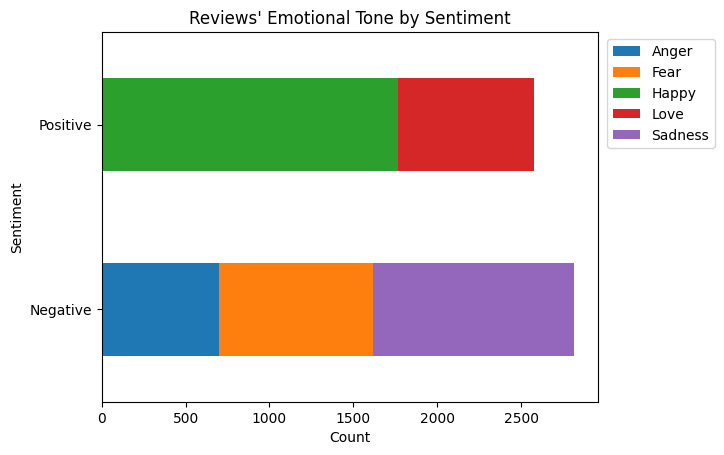

In [14]:
sentiment_emo = df.groupby(['sentiment', 'emotion']).size().unstack()

sentiment_emo.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')
plt.ylabel('Sentiment')
plt.xlabel('Count')
plt.title("Reviews' Emotional Tone by Sentiment")
plt.show()

Dari pengelompokkan review berdasarkan sentimen dan emosi dari review tersebut, review dengan emosi bahagia (happy) dan suka/cinta (love) juga merupakan review dengan sentimen positif. Sementara review dengan emosi marah (anger), ketakutan (fear), dan sedih (sadness) merupakan review dengan sentimen yang negatif.

## Product Ratings Analysis

Dalam menganalisa rating dari produk yang ada dalam dataset ini, akan digunakan rating produk yang diberikan oleh masing-masing pembeli (Customer Rating) karena rating yang diberikan sesuai dengan review yang diberikan oleh pembeli (walaupun tidak unique karena berada dalam range 1 - 5). Begitu pula dengan sentiment dan emotion dari review yang sesuai dengan review yang diberikan pembeli. Rating dari masing-masing pembeli akan dilihat berdasarkan sentiment dan emotion dari review masing-masing pembeli.

### Product Ratings by Reviews' Sentiment

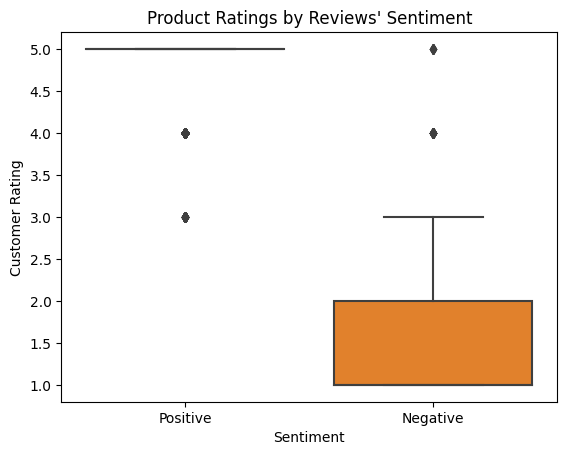

In [17]:
sns.boxplot(x=df['sentiment'], y=df['customer_rating'])
plt.title("Product Ratings by Reviews' Sentiment")
plt.ylabel('Customer Rating')
plt.xlabel('Sentiment')
plt.show()

Sesuai dengan sentimen dari review yang diberikan, review dengan sentimen positif memiliki rating yang tinggi dengan rata-rata 5. Sementara rating dengan sentimen negatif memiliki rating berkisar antara 1 sampai dengan 2.

### Product Ratings by Reviews' Emotional Tone

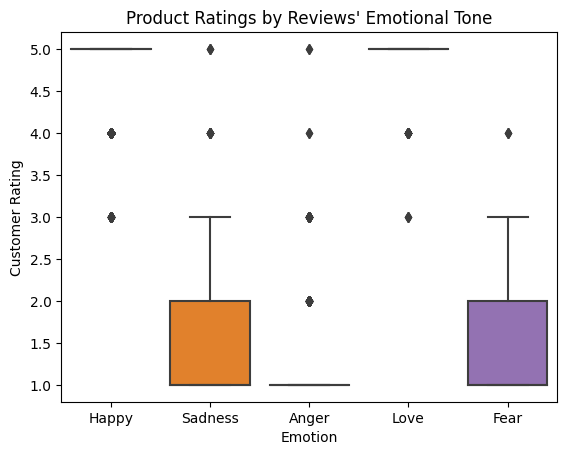

In [18]:
sns.boxplot(x=df['emotion'], y=df['customer_rating'])
plt.title("Product Ratings by Reviews' Emotional Tone")
plt.ylabel('Customer Rating')
plt.xlabel('Emotion')
plt.show()

Review dengan emosi bahagia (happy) dan suka/cinta (love) memiliki rata-rata rating produk sebesar 5. sebaliknya review yang memiliki emosi sedih (sadness), marah (anger), dan ketakutan (fear) memiliki rating yang rendah, di mana review dengan emosi sedih dan ketakutan memiliki review berkisar antara 1 sampai dengan 2, sementara review dengan emosi marah memiliki rata-rata rating produk 1.

## Product Price Analysis

### Product Price by Reviews' Sentiment

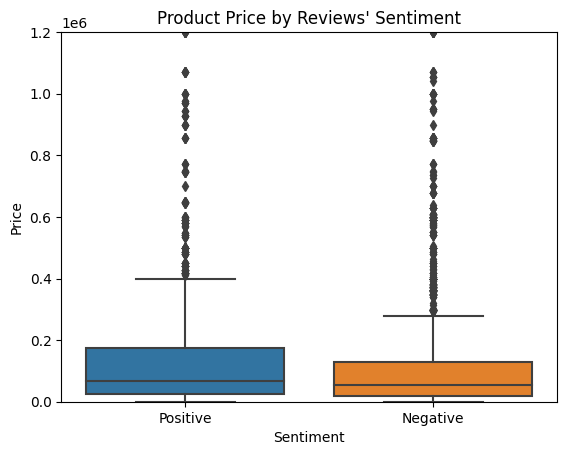

In [22]:
sns.boxplot(x=df['sentiment'], y=df['price'])
plt.ylim(0,1.2e6)
plt.title("Product Price by Reviews' Sentiment")
plt.ylabel('Price')
plt.xlabel('Sentiment')
plt.show()

Rata-rata harga produk yang memiliki review positif sedikit lebih tinggi dibandingkan dengan produk dengan review negatif, di mana sebagian besar produk yang ada dalam dataset ini memiliki harga produk di bawah Rp200.000.

### Product Price by Reviews' Emotional Tone

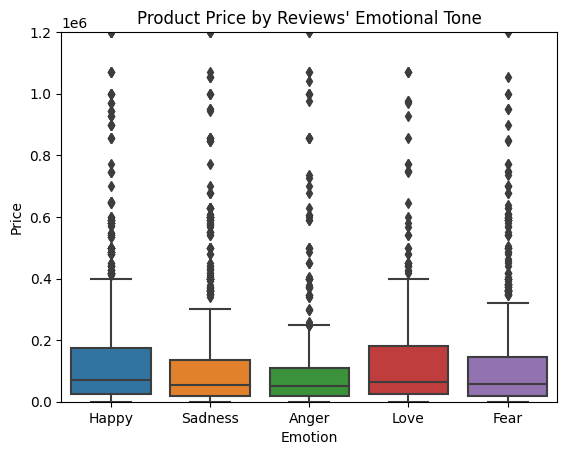

In [23]:
sns.boxplot(x=df['emotion'], y=df['price'])
plt.ylim(0,1.2e6)
plt.title("Product Price by Reviews' Emotional Tone")
plt.ylabel('Price')
plt.xlabel('Emotion')
plt.show()

Review produk yang memiliki emosi suka/cinta (love) memiliki harga produk yang paling tinggi dibandingkan dengan review dengan emosi lainnya, diikuti dengan review dengan emosi bahagia (happy), ketakutan (fear), sedih (sadness), dan marah (anger). Hal ini menandakan review produk yang memiliki perasaan yang positif memiliki harga produk yang sedikit lebih mahal dibandingkan dengan produk yang memiliki review dengan perasaan yang negatif.

### Product Price and Ratings Relationship

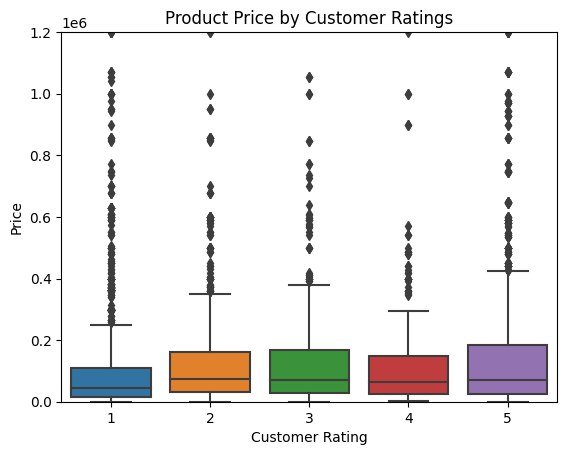

In [24]:
sns.boxplot(x=df['customer_rating'], y=df['price'])
plt.ylim(0,1.2e6)
plt.title("Product Price by Customer Ratings")
plt.ylabel('Price')
plt.xlabel('Customer Rating')
plt.show()

Produk yang memiliki rating 5 memiliki harga yang paling tinggi dibandingkan dengan produk dengan rating yang lebih rendah, diikuti dengan produk dengan rating 3, 2, 4, dan produk dengan rating 1 memiliki harga produk yang paling rendah. Hal ini cukup mengkonfirmasi temuan sebelumnya mengenai hubungan harga produk dengan sentimen dan emosi dari review suatu produk, di mana produk dengan rating 5 memiliki harga produk yang paling mahal sementara produk dengan rating 1 memiliki harga produk yang paling murah. Sementara produk dengan rating 2 sampai 4 tidak memastikan semakin mahal produknya semakin tinggi rating yang diberikan oleh pembeli. Pada produk dengan rating 4, yang merupakan rating dengan harga produk kedua terendah setelah produk dengan rating 1, rating bisa jadi diberikan karena pembeli cukup puas dengan kualitas produk jika dibandingkan dengan harganya, namun tidak benar-benar puas sehingga memberikan rating 5 untuk produk tersebut.

## Review Length Analysis

In [23]:
# Membuat kolom baru untuk panjang review (berdasarkan jumlah karakter) yang diberikan pembeli/user
df['review_length'] = df['customer_review'].apply(len)

### Review Length by Reviews' Sentiment

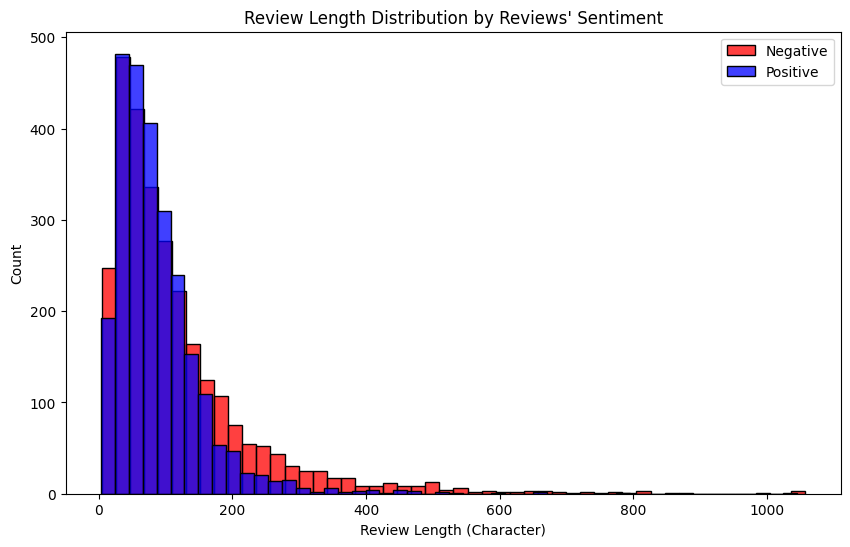

In [59]:
plt.figure(figsize=(10,6))

sns.histplot(data=df[df['sentiment'] == 'Negative'], x='review_length', bins=50, color='red', label='Negative')
sns.histplot(data=df[df['sentiment'] == 'Positive'], x='review_length', bins=50, color='blue', label='Positive')

plt.title("Review Length Distribution by Reviews' Sentiment")
plt.ylabel('Count')
plt.xlabel('Review Length (Character)')
plt.legend()
plt.show()

Rata-rata panjang review (dalam jumlah karakter) yang bersifat positif sedikit lebih pendek dibandingkan dengan review yang bersifat negatif, di mana baik review positif maupun negatif memiliki panjang review kurang dari 200 karakter. Sebagian besar review positif memiliki panjang sekitar 40 - 100 karakter, sementara review negatif memiliki panjang sekitar 20 - 180 karakter.

### Review Length by Reviews' Emotional Tone

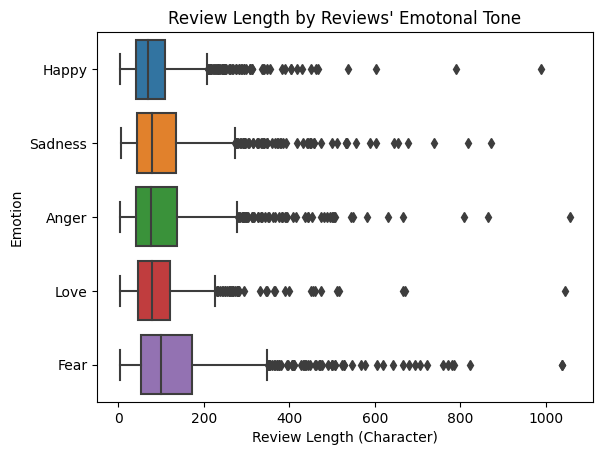

In [61]:
sns.boxplot(x=df['review_length'], y=df['emotion'], orient='h')
plt.title("Review Length by Reviews' Emotonal Tone")
plt.ylabel('Emotion')
plt.xlabel('Review Length (Character)')
plt.show()

Review dengan emosi ketakutan (fear) memiliki panjang review yang paling panjang dibandingkan dengan review dengan emosi lainnya, di mana review dengan emosi ini sebagian besar memiliki review dengan panjang 40 - 180 karakter. Berdasarkan panjang review-nya, setelah review dengan emosi ketakutan, review dengan emosi sedih (sadness) dan marah (anger) lebih panjang dibandingkan dengan review dengan emosi suka/cinta (love) dan bahagia (happy). Hal ini menunjukkan bahwa review dengan emosi yang negatif sedikit lebih panjang dengan review dengan emosi yang positif.

### Review Length by Product Ratings

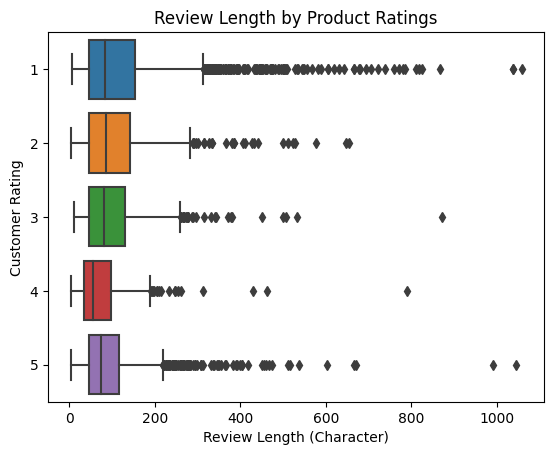

In [62]:
sns.boxplot(x=df['review_length'], y=df['customer_rating'], orient='h')
plt.title("Review Length by Product Ratings")
plt.ylabel('Customer Rating')
plt.xlabel('Review Length (Character)')
plt.show()

Semakin rendah rating yang diberikan pembeli terhadap suatu produk, semakin panjang pula review yang diberikan. Namun produk dengan rating 5 memiliki review yang sedikit lebih panjang dibandingkan dengan produk dengan rating 4, di mana produk dengan rating 4 memiliki review yang paling pendek dibandingkan dengan rating yang lebih rendah atau tinggi. Hal ini dapat disebabkan karena pembeli ingin memberikan apresiasi terhadap produk yang mereka beri rating 5 sehingga jumlah karakter dalam review mereka lebih panjang dibandingkan dengan review pada produk dengan rating 4. Namun pada produk dengan rating yang lebih rendah dari 4, pembeli ingin memberikan komplain terhadap penjual sehingga semakin rendah rating-nya semakin panjang review yang ditinggalkan oleh pembeli.

## Word Cloud Analysis

### Text Pre-processing

In [32]:
# Define Stopwords
stopwords_id = set(stopwords.words('indonesian'))
sw_1 = set(StopWordRemoverFactory().get_stop_words())
sw_2 = set(StopWord().get_stopword())
stopwords_id.update(sw_1)
stopwords_id.update(sw_2)
add_sw = {'tp', 'jg', 'tgl', 'utk', 'nya', 'yg', 'sih', 'aja', 'lg', 'barang', 'tokopedia', 'tokped', 'toped', 'tokopeda',
          'an', 'aaaa', 'hehe', 'laaah', 'kirim', 'yaa', 'krn', 'sy', 'dgn', 'dg', 'sdh', 'jd', 'brg', 'dapet', 'dah', 'sen',
          'gan', 'ny', 'kak', 'dpt', 'deh', 'udh', 'dr', 'dg', 'da', 'uda', 'nih', 'gw', 'gin', 'pdhl', 'duh', 'yah', 'loh',
          'lo', 'jual', 'beli', 'pesan', 'seller', 'toko', 'sesuai', 'produk', 'pakai', 'pake', 'dtg', 'jgn', 'rb', 'eh',
          'sya', 'tuh', 'klo', 'bs', 'wa', 'gr', 'spt', 'ps', 'lbh', 'pcs', 'pc', 'blm', 'dlm', 'cpt', 'hr', 'eh', 'knp','pd',
          'sm', 'jdi', 'bbrp', 'sma', 'sprti', 'kyk', 'ad', 'bagus', 'kualitas'}
remove_sw = {'tidak', 'kurang', 'akurat', 'seenaknya', 'masalahnya', 'segitu', 'sepihak', 'lama', 'pihak', 'alhamdulillah',
             'percuma', 'makasih', 'kelamaan', 'keterlaluan', 'tepat', 'berkali', 'sekali', 'macam', 'kesekian', 'baik',
             'waktu', 'cukup', 'banyak', 'biasa', 'baru', 'jelas', 'sesuai', 'sampai', 'betul', 'datang', 'masalah', 'kesekian'}
stopwords_id.update(add_sw)
stopwords_id.difference_update(remove_sw)

In [33]:
# Compiling RegEx
special_char_removal = re.compile(r"[^a-zA-Z\s\']")

# Word Variations Mappings
word_variations = {
    'ga': 'tidak', 'gak': 'tidak', 'ngga': 'tidak', 'gk': 'tidak', 'tdk': 'tidak',
    'manstapu': 'mantap', 'mantappp': 'mantap', 'mantabbb': 'mantap', 'mantappss': 'mantap',
    'mantaaaap': 'mantap', 'mantappppp': 'mantap', 'mantab': 'mantap',
    'bangett': 'banget', 'bangettt': 'banget', 'bgt': 'banget',
    'bagusss': 'bagus', 'baguss': 'bagus', 'bgs': 'bagus',
    'gpp': 'tidak apa-apa', 'hrg': 'harga', 'terimakasih': 'terima kasih'
}

# Define Lemmatizer
lemmatizer = Lemmatizer()

# Define text pre-processing function
def text_preprocessing(text, stop_words, lemmatizer):

    # Case folding
    text = text.lower()

    # Removing special characters
    text = special_char_removal.sub(" ", text)

    # Tokenization
    tokens = word_tokenize(text)

    # Correcting addtional spellings
    tokens = [word_variations.get(word, word) for word in tokens]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Stopwords removal
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join tokens
    processed_text = ' '.join(tokens)

    return processed_text

In [34]:
# Applying text preprocessing function on customer review
df['review_processed'] = df['customer_review'].apply(lambda review: text_preprocessing(review, stopwords_id, lemmatizer))
df

category  \
0     Computers and Laptops   
1     Computers and Laptops   
2     Computers and Laptops   
3     Computers and Laptops   
4     Computers and Laptops   
...                     ...   
5395              Household   
5396              Household   
5397              Household   
5398              Household   
5399              Household   

                                           product_name  \
0     Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...   
1     PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...   
2                   SSD Midasforce 128 Gb - Tanpa Caddy   
3     ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
4     ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
...                                                 ...   
5395  PCK-01 Penjepit Barang / Pickup Tool Ver.1 Ala...   
5396  Ultrasonic Aroma Diffuser Humidifier Colorful ...   
5397  Ultrasonic Aroma Diffuser Humidifier Colorful ...   
5398  Ultrasonic Aroma Diffuser Humidifier Colorful ...   
5399  TDS Meter 3 Alat Ukur Hidroponik Air Aquarium ...   

                    location   price  overall_rating  number_sold  \
0              Jakarta Utara   53500             4.9         5449   
1     Kota Tangerang Selatan   72000             4.9         2359   
2              Jakarta Barat  213000             5.0        12300   
3              Jakarta Timur   55000             4.7         2030   
4              Jakarta Timur   55000             4.7         2030   
...                      ...     ...             ...          ...   
5395           Jakarta Pusat   35000             4.9         1431   
5396           Jakarta Utara   99000             4.9        15529   
5397           Jakarta Utara   99000             4.9        15529   
5398           Jakarta Utara   99000             4.9        15529   
5399           Jakarta Utara   14400             4.9         4765   

      total_review  customer_rating  \
0             2369                5   
1             1044                5   
2             3573                5   
3              672                5   
4              672                5   
...            ...              ...   
5395           562                5   
5396          4074                5   
5397          4074                5   
5398          4074                5   
5399          3044                5   

                                        customer_review sentiment emotion  \
0     Alhamdulillah berfungsi dengan baik. Packaging...  Positive   Happy   
1     barang bagus dan respon cepat, harga bersaing ...  Positive   Happy   
2     barang bagus, berfungsi dengan baik, seler ram...  Positive   Happy   
3     bagus sesuai harapan penjual nya juga ramah. t...  Positive   Happy   
4     Barang Bagus, pengemasan Aman, dapat Berfungsi...  Positive   Happy   
...                                                 ...       ...     ...   
5395  Harga bersaing, barang sesuai pesanan. Saya na...  Positive    Love   
5396  Beli ini krn Anak & Istri mau liburan di Jakar...  Positive    Love   
5397  pengemasan barang baik, kondisi barang jg utuh...  Positive   Happy   
5398  Mungil tapi bekerja dng baik. Dan murahh terja...  Positive   Happy   
5399  Produk sesuai deskripsi, packing aman terlindu...  Positive    Love   

                                       review_processed  review_length  
0     alhamdulillah fungsi baik packaging aman respo...            100  
1                              respon cepat harga saing             61  
2                         fungsi baik seler ramah cepat             66  
3                   sesuai harap ramah trimakasih lapak             66  
4                                kemas aman fungsi baik             58  
...                                                 ...            ...  
5395  harga saing sesuai nambah extra packing kardus...            512  
5396  anak istri libur jakarta cari ketemu harga ram...            390  
5397  kemas baik kondisi utuh cacat fungsi normal la...  

In [35]:
# Checking missing reviews after processed
df.loc[df['review_processed'] == '']

category  \
343           Toys and Hobbies   
355           Toys and Hobbies   
757        Office & Stationery   
1371                 Body Care   
1495  Party Supplies and Craft   
1511  Party Supplies and Craft   
2250            Precious Metal   
2473                     Books   
2540                   Kitchen   
2546                   Kitchen   
2555                   Kitchen   
2559                   Kitchen   
2570                   Kitchen   
2599                   Kitchen   
3018           Women's Fashion   
3102          Movies and Music   
4302            Muslim Fashion   
4304            Muslim Fashion   
4340            Muslim Fashion   
5207                    Health   
5278                    Health   

                                           product_name         location  \
343         Permainan Stako Kayu 54 Balok dengan 4 Dadu   Kota Tangerang   
355               Iron Man Mark 50 Action Figure Recast    Jakarta Barat   
757   Label Barcode MURAH 100 x 150 A6 kertas stiker...    Jakarta Utara   
1371                    Lux Hand Sanitizer Jasmine 50ml   Kab. Tangerang   
1495  KOREK API ELEKTRIK FINGERPRINT TOUCH LED SENSO...    Jakarta Utara   
1511  KOREK API ELEKTRIK FINGERPRINT TOUCH LED SENSO...    Jakarta Utara   
2250                              WW additional PICTURE    Kab. Semarang   
2473            Komik Seri : One Piece ( Eiichiro Oda )    Jakarta Barat   
2540  Pematik Gas-Korek Api Kompor-Korek Gas Panjang...    Jakarta Utara   
2546  Pisau Set 6 in 1 Stainless Ceramic Anti Lengke...    Jakarta Utara   
2555  Tefal Cook & Clean Frypan 26cm Wajan Anti Lengket   Kab. Tangerang   
2559  Tefal Cook & Clean Frypan 24cm Wajan Anti Lengket   Kab. Tangerang   
2570  Carote EW Wajan Penggorengan Anti Lengket (Fry...   Kab. Tangerang   
2599  Onix Dispenser Galon Air Aqua Pompa Galon Auto...    Jakarta Barat   
3018  Masker strap / Tali Masker / Aksesoris masker ...      Kota Bekasi   
3102            Clip On Mic Bando untuk Youtuber mc dll    Jakarta Pusat   
4302  Konektor Masker Hijab Kristal Premium Hijaberl...       Kota Depok   
4304        Konektor Tali Masker Kristal Hijab - Silver    Jakarta Timur   
4340  HIJAB SPORT INSTAN/ HIJAB OLAHRAGA/ HIJAB PET ...  Jakarta Selatan   
5207  10ml Lemongrass Essential Oil | Minyak Sereh D...     Kota Bandung   
5278  Peppermint Essential Oil / Minyak Mint Aroma T...   Kab. Tangerang   

       price  overall_rating  number_sold  total_review  customer_rating  \
343    35000             4.6         1353           680                5   
355   110000             4.8         1033           707                5   
757    75000             5.0         7118           551                5   
1371   29100             4.9       143400          5572                1   
1495   15999             4.8         3491           875                1   
1511   15999             4.8         3495           877                1   
2250   60000             5.0          419           148                5   
2473   22400             4.9         7178          1018                4   
2540    9000             4.9        23600          1849                4   
2546   55000             4.9         3041          1253                4   
2555  419000             4.9         2792          1454                5   
2559  359000             4.9         3890          2113                5   
2570  440000             5.0         3772          2358                5   
2599   70000             4.9        13300          7535                5   
3018   15000             4.9        18000          2924                5   
3102    6500             4.7         3534           462                5   
4302   21900             4.9          804           207                5   
4304   17500             4.9         2707           718                5   
4340   30000             4.9         3737           917                5   
5207   28000             4.9         3059          1288                5   
5278

In [36]:
# Dropping missing reviews from word cloud analysis
wc_df = df.loc[df['review_processed'] != '']
wc_df = wc_df.reset_index(drop=True)
wc_df

category  \
0     Computers and Laptops   
1     Computers and Laptops   
2     Computers and Laptops   
3     Computers and Laptops   
4     Computers and Laptops   
...                     ...   
5367              Household   
5368              Household   
5369              Household   
5370              Household   
5371              Household   

                                           product_name  \
0     Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...   
1     PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...   
2                   SSD Midasforce 128 Gb - Tanpa Caddy   
3     ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
4     ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
...                                                 ...   
5367  PCK-01 Penjepit Barang / Pickup Tool Ver.1 Ala...   
5368  Ultrasonic Aroma Diffuser Humidifier Colorful ...   
5369  Ultrasonic Aroma Diffuser Humidifier Colorful ...   
5370  Ultrasonic Aroma Diffuser Humidifier Colorful ...   
5371  TDS Meter 3 Alat Ukur Hidroponik Air Aquarium ...   

                    location   price  overall_rating  number_sold  \
0              Jakarta Utara   53500             4.9         5449   
1     Kota Tangerang Selatan   72000             4.9         2359   
2              Jakarta Barat  213000             5.0        12300   
3              Jakarta Timur   55000             4.7         2030   
4              Jakarta Timur   55000             4.7         2030   
...                      ...     ...             ...          ...   
5367           Jakarta Pusat   35000             4.9         1431   
5368           Jakarta Utara   99000             4.9        15529   
5369           Jakarta Utara   99000             4.9        15529   
5370           Jakarta Utara   99000             4.9        15529   
5371           Jakarta Utara   14400             4.9         4765   

      total_review  customer_rating  \
0             2369                5   
1             1044                5   
2             3573                5   
3              672                5   
4              672                5   
...            ...              ...   
5367           562                5   
5368          4074                5   
5369          4074                5   
5370          4074                5   
5371          3044                5   

                                        customer_review sentiment emotion  \
0     Alhamdulillah berfungsi dengan baik. Packaging...  Positive   Happy   
1     barang bagus dan respon cepat, harga bersaing ...  Positive   Happy   
2     barang bagus, berfungsi dengan baik, seler ram...  Positive   Happy   
3     bagus sesuai harapan penjual nya juga ramah. t...  Positive   Happy   
4     Barang Bagus, pengemasan Aman, dapat Berfungsi...  Positive   Happy   
...                                                 ...       ...     ...   
5367  Harga bersaing, barang sesuai pesanan. Saya na...  Positive    Love   
5368  Beli ini krn Anak & Istri mau liburan di Jakar...  Positive    Love   
5369  pengemasan barang baik, kondisi barang jg utuh...  Positive   Happy   
5370  Mungil tapi bekerja dng baik. Dan murahh terja...  Positive   Happy   
5371  Produk sesuai deskripsi, packing aman terlindu...  Positive    Love   

                                       review_processed  review_length  
0     alhamdulillah fungsi baik packaging aman respo...            100  
1                              respon cepat harga saing             61  
2                         fungsi baik seler ramah cepat             66  
3                   sesuai harap ramah trimakasih lapak             66  
4                                kemas aman fungsi baik             58  
...                                                 ...            ...  
5367  harga saing sesuai nambah extra packing kardus...            512  
5368  anak istri libur jakarta cari ketemu harga ram...            390  
5369  kemas baik kondisi utuh cacat fungsi normal la...  

### Most Used Words Based on Reviews' Sentiment

#### Most Used Words on Positive Reviews

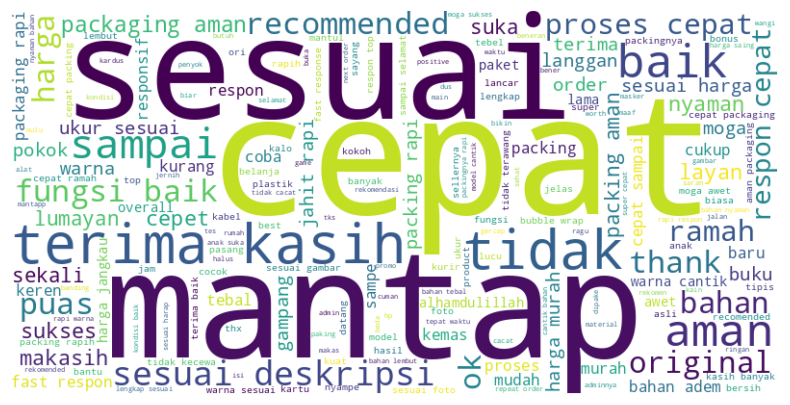

In [38]:
# Word cloud for positive reviews
positive_rev = wc_df['review_processed'][wc_df['sentiment'] == 'Positive'].str.cat(sep=' ')
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_rev)

# Menggambarkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

Pada review yang bersifat positif, sebagian besar pembeli memuji kecepatan pengiriman serta keamanan pengemasan barang. Selain itu terdapat kata mantap, original, sesuai, dan kata positif lainnya yang mendeskripsikan bahwa produk memiliki kualitas yang baik. Selain itu terdapat kata terima kasih yang berarti pembeli berterima kasih kepada penjual dari barang yang mereka beli.

#### Most Used Words on Negative Reviews

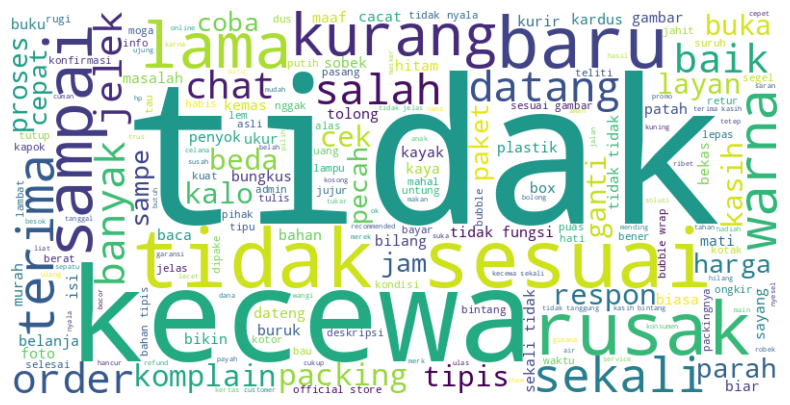

In [39]:
# Word cloud for negative reviews
negative_rev = wc_df['review_processed'][wc_df['sentiment'] == 'Negative'].str.cat(sep=' ')
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_rev)

# Menggambarkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

Pada review yang bersifat negatif, terdapat kata yang menggambarkan kekecewaan pembeli seperti kata kecewa dan tidak sesuai. Dalam review yang bersifat negatif juga terdapat kata-kata yang menggambarkan kualitas barang yang kurang bagus seperti rusak, salah, dan jelek. Selain itu terdapat kata lama yang dapat menggambarkan kecepatan pengiriman dari barang yang memiliki review negatif.

### Most Used Words Based on Reviews' Emotional Tone

#### Most Used Words on Happy Reviews

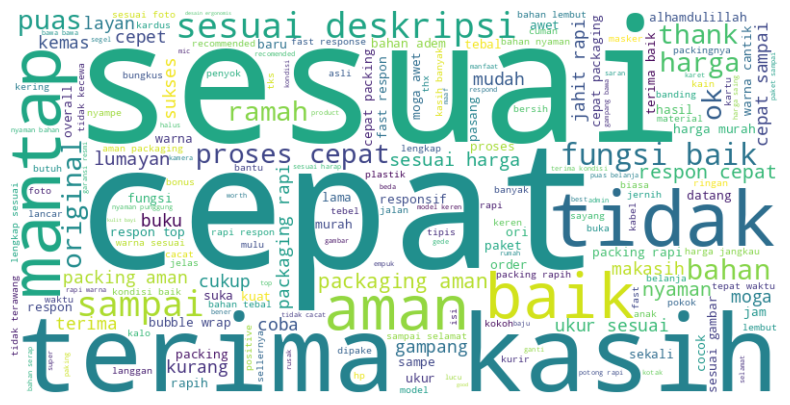

In [40]:
# Word cloud for happy reviews
happy_rev = wc_df['review_processed'][wc_df['emotion'] == 'Happy'].str.cat(sep=' ')
wordcloud_happy = WordCloud(width=800, height=400, background_color='white').generate(happy_rev)

# Menggambarkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_happy, interpolation='bilinear')
plt.axis('off')
plt.show()

Pada review yang memiliki emosi bahagia (happy), pembeli memberikan review yang menggambarkan kepuasan terhadap kecepatan pengiriman barang dan kesesuaian antara deskripsi produk dan produk yang benar-benar didapatkan oleh pembeli.Selain itu sama dengan pada review positif terdapat kata terima kasih yang berarti pembeli berterima kasih kepada penjual dari barang yang mereka beli.

#### Most Used Words on Love Reviews

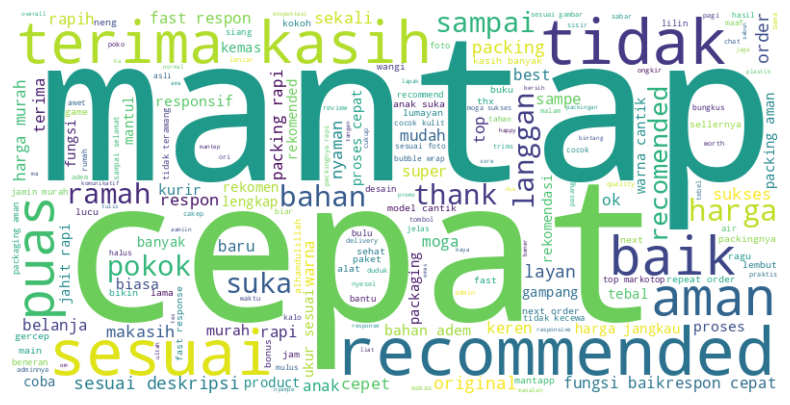

In [43]:
# Word cloud for love reviews
love_rev = wc_df['review_processed'][wc_df['emotion'] == 'Love'].str.cat(sep=' ')
wordcloud_love = WordCloud(width=800, height=400, background_color='white').generate(love_rev)

# Menggambarkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_love, interpolation='bilinear')
plt.axis('off')
plt.show()

Pada review dengan emosi suka/cinta (love), sebagian besar pembeli memberikan pujian terhadap kualitas barang dengan kata mantap, baik, sesuai, puas, dan recommended. Pembeli juga memuji kecepatan serta keamanan pengiriman. Sama dengan review dengan emosi bahagia, pembeli berterima kasih atas barang yang telah dibeli dalam review yang mereka tinggalkan.

#### Most Used Words on Sad Reviews

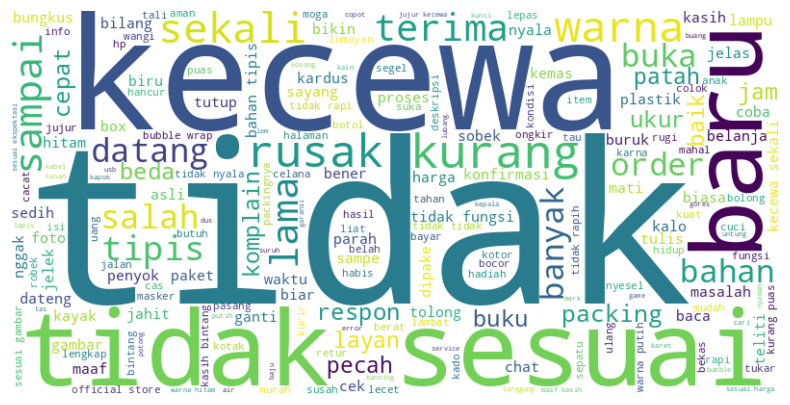

In [44]:
# Word cloud for sad reviews
sad_rev = wc_df['review_processed'][wc_df['emotion'] == 'Sadness'].str.cat(sep=' ')
wordcloud_sad = WordCloud(width=800, height=400, background_color='white').generate(sad_rev)

# Menggambarkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sad, interpolation='bilinear')
plt.axis('off')
plt.show()

Dalam review yang bersifat sedih (sadness), pembeli menggambarkan kekecewaannya dengan kata-kata tidak, tidak sesuai, dan kecewa. Pembeli juga menggambarkan kualitas barang yang dibeli dengan kata rusak, kurang, salah, dan tipis.

#### Most Used Words on Angry Reviews

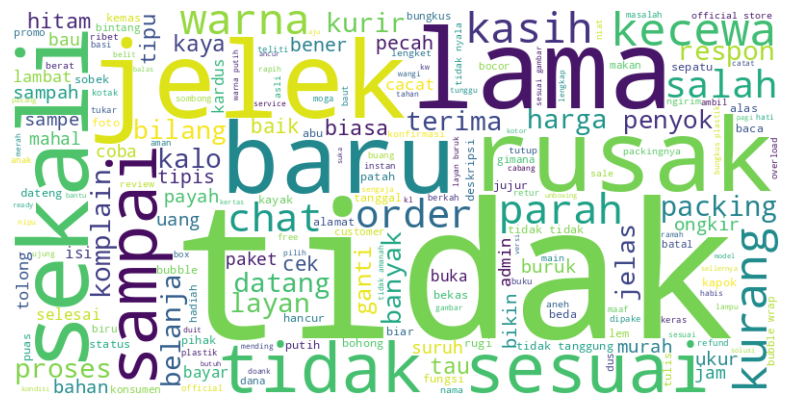

In [46]:
# Word cloud for angry reviews
anger_rev = wc_df['review_processed'][wc_df['emotion'] == 'Anger'].str.cat(sep=' ')
wordcloud_anger = WordCloud(width=800, height=400, background_color='white').generate(anger_rev)

# Menggambarkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_anger, interpolation='bilinear')
plt.axis('off')
plt.show()

Sebagian besar review yang memiliki emosi marah (anger) menggambarkan kurangnya kualitas barang yang dibeli dengan kata-kata tidak, tidak sesuai, rusak, dan jelek. Selain itu pembeli juga menggambarkan lamanya pengiriman barang yang mereka beli.

#### Most Used Words on Fear Reviews

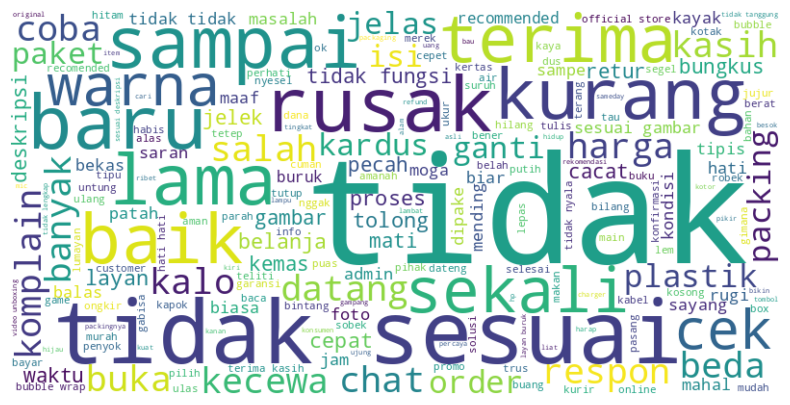

In [45]:
# Word cloud for fear reviews
fear_rev = wc_df['review_processed'][wc_df['emotion'] == 'Fear'].str.cat(sep=' ')
wordcloud_fear = WordCloud(width=800, height=400, background_color='white').generate(fear_rev)

# Menggambarkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fear, interpolation='bilinear')
plt.axis('off')
plt.show()

Dibandingkan dengan review produk yang bersifat negatif, review produk dengan emosi sedih atau marah, review dengan emosi ketakutan (fear) memiliki tren kemunculan kata-kata yang lebih merata. Walaupun kata-kata yang digunakan masih sama dengan review dengan emosi negatif lainnya, yaitu tidak, tidak sesuai, rusak, kurang, dan lama. Namun, pembeli juga sering menggunakan kata-kata sampai dan baru untuk menggambarkan waktu sampainya barang yang di beli, serta warna dan baik untuk menggambarkan barang yang dibeli.

### Most Used Words Based on Products' Rating

#### Most Used Words on 5 Star Ratings

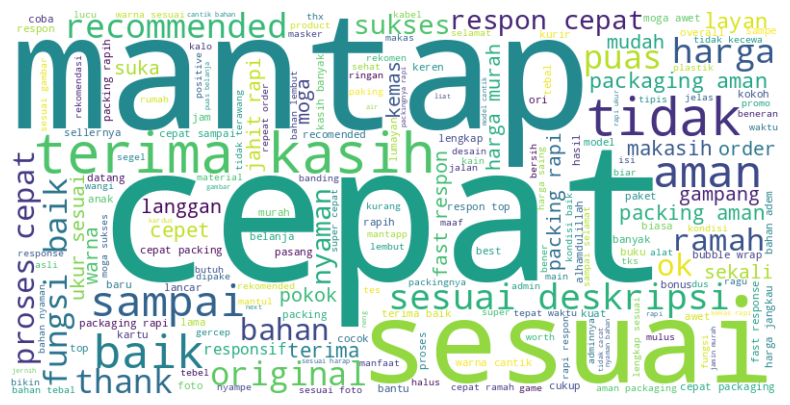

In [48]:
# Word cloud for angry reviews
review_5 = wc_df['review_processed'][wc_df['customer_rating'] == 5].str.cat(sep=' ')
wordcloud_5 = WordCloud(width=800, height=400, background_color='white').generate(review_5)

# Menggambarkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_5, interpolation='bilinear')
plt.axis('off')
plt.show()

Pada review dari produk yang memiliki rating 5, sebagian besar pembeli memuji kualitas barang dengan kata-kata mantap, sesuai deskripsi, berfungsi (dengan) baik, original, dan kata-kata positif lainnya. Selain itu pembeli juga memuji kecepatan baik dari proses pengiriman maupun respon penjual terhadap chat pembeli. Pembeli juga berterima kasih kepada penjual, merekomendasikan penjual/toko (dengan kata recommend), dan mengharapkan kesuksesan dari penjual/toko.

#### Most Used Words on 4 Star Ratings

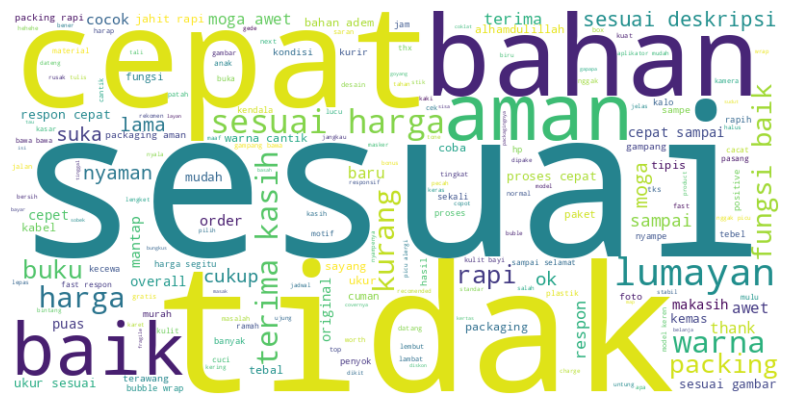

In [49]:
# Word cloud for angry reviews
review_4 = wc_df['review_processed'][wc_df['customer_rating'] == 4].str.cat(sep=' ')
wordcloud_4 = WordCloud(width=800, height=400, background_color='white').generate(review_4)

# Menggambarkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_4, interpolation='bilinear')
plt.axis('off')
plt.show()

Pada review dari produk yang diberikan rating 4, sebagian besar pembeli menggunakan kata bahan, sesuai harga, sesuai deskripsi, baik, berfungsi (dengan) baik, dan lumayan untuk menggambarkan kualitas barang yang dibeli. Selain itu pembeli juga menggambarkan kecepatan pengiriman barang dan keamanan pengemasan barang. Namun pembeli juga sering menggunakan kata tidak dalam review yang diberikan.

#### Most Used Words on 3 Star Ratings

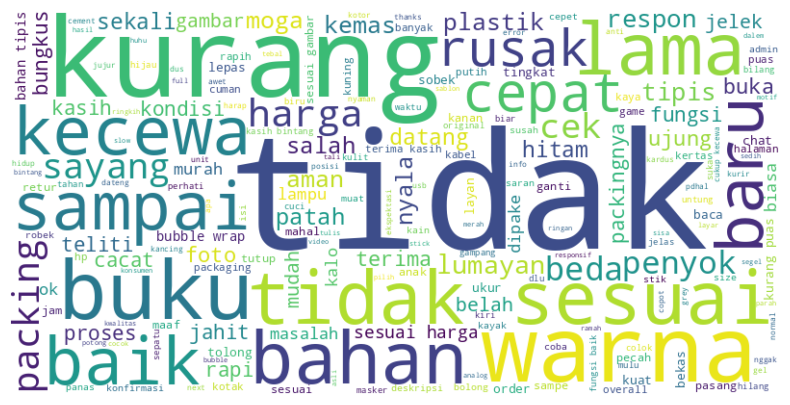

In [50]:
# Word cloud for angry reviews
review_3 = wc_df['review_processed'][wc_df['customer_rating'] == 3].str.cat(sep=' ')
wordcloud_3 = WordCloud(width=800, height=400, background_color='white').generate(review_3)

# Menggambarkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_3, interpolation='bilinear')
plt.axis('off')
plt.show()

Pada review dari produk yang memiliki rating 3, pembeli menggambarkan barang yang dibeli dengan kata-kata tidak, tidak sesuai, kurang, bahan, warna, rusak, buku, baik, lumayan, beda, dan penyok. Selain itu pembeli juga menggambarkan pengiriman dan pengemasan barang dengan kata packing, cepat dan lama.

#### Most Used Words on 2 Star Ratings

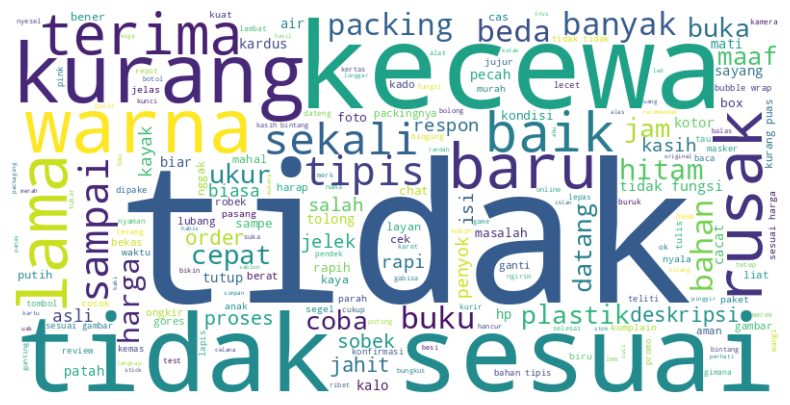

In [51]:
# Word cloud for angry reviews
review_2 = wc_df['review_processed'][wc_df['customer_rating'] == 2].str.cat(sep=' ')
wordcloud_2 = WordCloud(width=800, height=400, background_color='white').generate(review_2)

# Menggambarkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis('off')
plt.show()

Pembeli menggambarkan kekecewaan pada barang yang diberikan rating 2 dengan kata-kata tidak sesuai, kecewa, kurang, tipis, beda, dan rusak. Selain itu pembeli juga mengeluhkan lamanya pengiriman barang yang dibeli.

#### Most Used Words on 1 Star Ratings

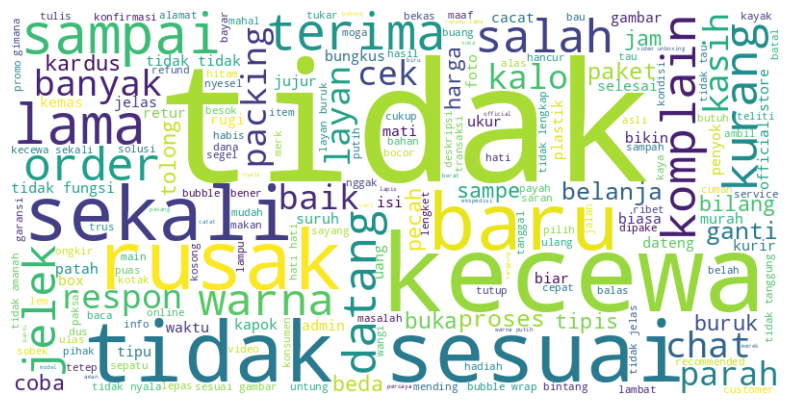

In [47]:
# Word cloud for angry reviews
review_1 = wc_df['review_processed'][wc_df['customer_rating'] == 1].str.cat(sep=' ')
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(review_1)

# Menggambarkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.show()

Hampir sama dengan review produk yang memiliki rating 2, pada produk yang diberikan rating 1 pembeli mengeluhkan produk yang tidak sesuai, rusak, jelek, salah, dan kurang pada review yang mereka tinggalkan. Selain itu, pembeli menggambarkan keadaan pengiriman dan pengemasan dengan kata datang, terima, packing dan lama. Terdapat pula kata kecewa dan komplain yang menggambarkan kekecewaan pembeli dan menunjukkan bahwa pembeli sudah memberikan komplain kepada penjual.

# Save Final Processed Data

In [66]:
wc_df.to_csv('processed_eda.csv', index=False)

# Conclusion

Review yang memiliki emosi bahagia (happy) dan suka/cinta (love) merupakan review yang memiliki sentimen positif, sementara review dengan emosi ketakutan (fear), sedih (sadness), dan marah (anger) merupakan review yang memiliki sentimen negatif.

Rating dari produk yang memiliki review positif lebih tinggi dibandingkan dengan produk yang memiliki review negatif. Sementara harga produk yang memiliki review positif baik dari sentimen maupun emosi sedikit lebih mahal dibandingkan dengan produk yang memiliki review negatif. Hal yang sama juga berlaku pada produk dengan rating yang lebih tinggi memiliki harga yang sedikit lebih mahal dibandingkan dengan produk dengan rating yang lebih rendah, kecuali pada produk dengan rating 4.

Hal yang sebaliknya terjadi pada hubungan sentimen dan emosi review serta rating produk terhadap panjang review (dalam jumlah karakter) di mana produk dengan review yang negatif memiliki review yang lebih panjang daripada produk dengan review yang positif. Begitu pula pada produk dengan rating yang lebih rendah memiliki panjang review yang lebih panjang dibandingkan dengan review produk yang lebih tinggi, kecuali pada produk dengan rating 5 yang memiliki panjang review yang sedikit lebih panjang dibandingkan review produk dengan rating 4.

Pada review yang bersifat positif dan review pada produk dengan rating yang tinggi, kata-kata yang sering muncul adalah mantap, cepat, sesuai, dan terima kasih. Sementara pada review yang bersifat negatif dan review produk dengan rating yang rendah, kata-kata yang sering muncul adalah tidak sesuai, kurang, kecewa, jelek, dan rusak.